In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# Load data

In [2]:
df = pd.read_csv("datasets/Schwelle_Senke/fleet_data__from_11_05_22_and_before__9millionrows.csv", low_memory=False) # , sheet_name=0)

In [3]:
df.columns

Index(['Unnamed: 0', 'zds_telemetrydata_mst.metadata_sourceid',
       'zds_telemetrydata_mst.metadata_region',
       'zds_telemetrydata_mst.metadata_brand',
       'zds_telemetrydata_mst.metadata_reportid',
       'zds_telemetrydata_mst.metadata_sessionsequence',
       'zds_telemetrydata_mst.metadata_timeofreceipt',
       'zds_telemetrydata_mst.metadata_pvin',
       'zds_telemetrydata_mst.metadata_sessionid',
       'zds_telemetrydata_mst.metadata_messageid',
       'zds_telemetrydata_mst.signaldata_signalid',
       'zds_telemetrydata_mst.signaldata_signalname',
       'zds_telemetrydata_mst.signaldata_unit',
       'zds_telemetrydata_mst.signaldata_timeofoccurrence',
       'zds_telemetrydata_mst.signaldata_rawvalue_signalopaquevalue',
       'zds_telemetrydata_mst.signaldata_rawvalue_signalvalue',
       'zds_telemetrydata_mst.signaldata_interpretedvalue_asdoublevalue',
       'zds_telemetrydata_mst.signaldata_interpretedvalue_asstringvalue',
       'zds_telemetrydata_mst.signa

In [4]:
df.head()

,Unnamed: 0,zds_telemetrydata_mst.metadata_sourceid,zds_telemetrydata_mst.metadata_region,zds_telemetrydata_mst.metadata_brand,zds_telemetrydata_mst.metadata_reportid,zds_telemetrydata_mst.metadata_sessionsequence,zds_telemetrydata_mst.metadata_timeofreceipt,zds_telemetrydata_mst.metadata_pvin,zds_telemetrydata_mst.metadata_sessionid,zds_telemetrydata_mst.metadata_messageid,...,zds_telemetrydata_mst.signaldata_interpretedvalue_asstringvalue,zds_telemetrydata_mst.signaldata_interpretedvalue_isvalid,zds_telemetrydata_mst.signaldata_interpretedvalue_iserror,zds_telemetrydata_mst.signaldata_interpretedvalue_isinit,zds_telemetrydata_mst.histogram,zds_telemetrydata_mst.date,zds_telemetrydata_mst.metadata_campaignid,zds_telemetrydata_mst.year,zds_telemetrydata_mst.month,zds_telemetrydata_mst.day
0,0,Porsche:IT,eu,Porsche:IT,d4feb93f-3d86-423d-a7e6-75d582729067,5,1651159474158,c7b0a1b3051fba5898dc460291c2d32f,NaN,4e667e28-c847-4c3b-822f-5d42079c8158,...,NaN,True,False,False,NaN,2022-04-28,0e25f491-cc8f-4017-aea4-fca47fe57ac5,2022,4,28
1,1,Porsche:DE,eu,Porsche:DE,d4feb93f-3d86-423d-a7e6-75d582729067,1,1651130943346,a36767d2f8c7280fbbb4f113909f3e3b,NaN,7cd3f1a5-db16-4f63-a748-8b3d21cd4c6d,...,NaN,True,False,False,NaN,2022-04-28,0e25f491-cc8f-4017-aea4-fca47fe57ac5,2022,4,28
2,2,Porsche:IT,eu,Porsche:IT,d4feb93f-3d86-423d-a7e6-75d582729067,5,1651159474158,c7b0a1b3051fba5898dc460291c2d32f,NaN,4e667e28-c847-4c3b-822f-5d42079c8158,...,NaN,True,False,False,NaN,2022-04-28,0e25f491-cc8f-4017-aea4-fca47fe57ac5,2022,4,28
3,3,Porsche:DE,eu,Porsche:DE,d4feb93f-3d86-423d-a7e6-75d582729067,1,1651130943346,a36767d2f8c7280fbbb4f113909f3e3b,NaN,7cd3f1a5-db16-4f63-a748-8b3d21cd4c6d,...,NaN,True,False,False,NaN,2022-04-28,0e25f491-cc8f-4017-aea4-fca47fe57ac5,2022,4,28
4,4,Porsche:IT,eu,Porsche:IT,d4feb93f-3d86-423d-a7e6-75d582729067,5,1651159474158,c7b0a1b3051fba5898dc460291c2d32f,NaN,4e667e28-c847-4c3b-822f-5d42079c8158,...,NaN,True,False,False,NaN,2022-04-28,0e25f491-cc8f-4017-aea4-fca47fe57ac5,2022,4,28


In [5]:
df["zds_telemetrydata_mst.metadata_brand"].value_counts()

Porsche:DE    3340219
Porsche:PL    1869079
Porsche:SE     815695
Porsche:BE     802935
Porsche:CH     717027
Porsche:FR     469834
Porsche:GB     368290
Porsche:IT     256522
Porsche:NO     224241
Porsche:NL     179154
Porsche:AT     170110
Porsche:LU      98148
Porsche:ES      24750
Porsche:SI      13500
Name: zds_telemetrydata_mst.metadata_brand, dtype: int64

In [6]:
df["zds_telemetrydata_mst.metadata_region"].value_counts()

eu    9349504
Name: zds_telemetrydata_mst.metadata_region, dtype: int64

In [7]:
df["zds_telemetrydata_mst.metadata_pvin"].value_counts()

5bcf863993ae5928243c8af871d6ccbc    978384
4989ca4dc2f8c580284eb3c5d0c01cae    627353
1edec18836297b0cac0fb1d0b33b1bae    462301
6086b94a1994a388f74a786a40a53401    434517
8e54ddde2e1c2293b27c5b4fbb8da3fe    249605
                                     ...  
240fde6db0f8fb6d70a2f851317eedf7      4500
35efde8a9a27565067b45106c74f37ff      2250
bbdf740ecd57e8387b64ff8254f576fb      2250
b365e8d9ec298489f44917b6c3e44ed8      2250
5e995f8e820f811da09cb60e2093a1a3      2250
Name: zds_telemetrydata_mst.metadata_pvin, Length: 104, dtype: int64

In [8]:
df["zds_telemetrydata_mst.signaldata_unit"].value_counts()

Series([], Name: zds_telemetrydata_mst.signaldata_unit, dtype: int64)

In [9]:
df["zds_telemetrydata_mst.date"].value_counts()

2022-05-11    1530734
2022-05-09     795501
2022-05-04     747459
2022-05-10     731844
2022-05-02     676404
2022-05-03     661923
2022-05-06     639329
2022-05-07     629226
2022-04-29     617930
2022-05-05     601622
2022-05-01     482846
2022-05-08     463894
2022-04-28     447853
2022-04-30     322939
Name: zds_telemetrydata_mst.date, dtype: int64

# Rename columns

In [10]:
new_df = df.rename(columns=lambda s: s.replace("zds_telemetrydata_mst.", "")) # df will not be modified !

In [11]:
new_df.columns

Index(['Unnamed: 0', 'metadata_sourceid', 'metadata_region', 'metadata_brand',
       'metadata_reportid', 'metadata_sessionsequence',
       'metadata_timeofreceipt', 'metadata_pvin', 'metadata_sessionid',
       'metadata_messageid', 'signaldata_signalid', 'signaldata_signalname',
       'signaldata_unit', 'signaldata_timeofoccurrence',
       'signaldata_rawvalue_signalopaquevalue',
       'signaldata_rawvalue_signalvalue',
       'signaldata_interpretedvalue_asdoublevalue',
       'signaldata_interpretedvalue_asstringvalue',
       'signaldata_interpretedvalue_isvalid',
       'signaldata_interpretedvalue_iserror',
       'signaldata_interpretedvalue_isinit', 'histogram', 'date',
       'metadata_campaignid', 'year', 'month', 'day'],
      dtype='object')

In [12]:
new_df["signaldata_interpretedvalue_isvalid"].value_counts()

True     9323007
False      26497
Name: signaldata_interpretedvalue_isvalid, dtype: int64

In [13]:
new_df.shape[0]

9349504

In [14]:
new_df = new_df[new_df["signaldata_interpretedvalue_isvalid"] == True]

In [15]:
new_df.shape[0]

9323007

In [16]:
new_df["signaldata_interpretedvalue_iserror"].value_counts()

False    9323007
Name: signaldata_interpretedvalue_iserror, dtype: int64

In [17]:
new_df["metadata_region"].value_counts()

eu    9323007
Name: metadata_region, dtype: int64

In [18]:
new_df = new_df.drop(["metadata_region"], axis=1)

In [19]:
new_df["year"].value_counts()

2022    9323007
Name: year, dtype: int64

In [20]:
new_df = new_df.drop(["year"], axis=1)

In [21]:
new_df["histogram"].value_counts()

Series([], Name: histogram, dtype: int64)

# Delete columns with ONLY nan values

In [22]:
list_nan_columns = new_df.columns[new_df.isnull().all()].tolist()
list_nan_columns

['metadata_sessionid',
 'signaldata_unit',
 'signaldata_rawvalue_signalopaquevalue',
 'signaldata_interpretedvalue_asstringvalue',
 'histogram']

In [23]:
new_df = new_df.drop(list_nan_columns, axis=1)

# Delete columns with same values

In [24]:
[(i, j) for i,j in combinations(new_df, 2) if new_df[i].equals(new_df[j])]

[('metadata_sourceid', 'metadata_brand'),
 ('signaldata_interpretedvalue_iserror', 'signaldata_interpretedvalue_isinit')]

In [25]:
new_df = new_df.drop(["metadata_brand", "signaldata_interpretedvalue_isinit"], axis=1)
# new_df

In [26]:
new_df.columns

Index(['Unnamed: 0', 'metadata_sourceid', 'metadata_reportid',
       'metadata_sessionsequence', 'metadata_timeofreceipt', 'metadata_pvin',
       'metadata_messageid', 'signaldata_signalid', 'signaldata_signalname',
       'signaldata_timeofoccurrence', 'signaldata_rawvalue_signalvalue',
       'signaldata_interpretedvalue_asdoublevalue',
       'signaldata_interpretedvalue_isvalid',
       'signaldata_interpretedvalue_iserror', 'date', 'metadata_campaignid',
       'month', 'day'],
      dtype='object')

In [27]:
new_df["metadata_campaignid"].value_counts()

0e25f491-cc8f-4017-aea4-fca47fe57ac5    9323007
Name: metadata_campaignid, dtype: int64

In [28]:
new_df["metadata_sourceid"].value_counts()

Porsche:DE    3330226
Porsche:PL    1863990
Porsche:SE     813622
Porsche:BE     800347
Porsche:CH     714429
Porsche:FR     468328
Porsche:GB     367726
Porsche:IT     255758
Porsche:NO     223882
Porsche:NL     178530
Porsche:AT     169874
Porsche:LU      98111
Porsche:ES      24749
Porsche:SI      13435
Name: metadata_sourceid, dtype: int64

In [29]:
new_df["metadata_reportid"].value_counts()

d4feb93f-3d86-423d-a7e6-75d582729067    9323007
Name: metadata_reportid, dtype: int64

In [30]:
new_df["metadata_sessionsequence"].value_counts()

0      269573
1      245854
2      236357
4      215681
3      209304
        ...  
363      1887
316      1501
362      1024
360       217
361       192
Name: metadata_sessionsequence, Length: 415, dtype: int64

# Select columns to build training dataset

In [31]:
data = new_df[[
            "metadata_sourceid",
            "metadata_sessionsequence",
            "metadata_pvin",
            "date",
            "signaldata_signalid", 
            "signaldata_signalname", 
            "signaldata_timeofoccurrence", 
            "signaldata_rawvalue_signalvalue", 
            "signaldata_interpretedvalue_asdoublevalue",
            ]]

In [32]:
data

,metadata_sourceid,metadata_sessionsequence,metadata_pvin,date,signaldata_signalid,signaldata_signalname,signaldata_timeofoccurrence,signaldata_rawvalue_signalvalue,signaldata_interpretedvalue_asdoublevalue
0,Porsche:IT,5,c7b0a1b3051fba5898dc460291c2d32f,2022-04-28,102812,ESP_v_Signal,1651159427639,0,0.0
1,Porsche:DE,1,a36767d2f8c7280fbbb4f113909f3e3b,2022-04-28,102812,ESP_v_Signal,1651129811129,0,0.0
2,Porsche:IT,5,c7b0a1b3051fba5898dc460291c2d32f,2022-04-28,102812,ESP_v_Signal,1651159427659,0,0.0
3,Porsche:DE,1,a36767d2f8c7280fbbb4f113909f3e3b,2022-04-28,102812,ESP_v_Signal,1651129811149,0,0.0
4,Porsche:IT,5,c7b0a1b3051fba5898dc460291c2d32f,2022-04-28,102812,ESP_v_Signal,1651159427679,0,0.0
...,...,...,...,...,...,...,...,...,...
9349499,Porsche:DE,0,aef70266af644c03d56cd20fdc45c2e4,2022-05-09,120389,FA_Hoehenwert_HL_00,1652126490140,125,-2.0
9349500,Porsche:DE,0,aef70266af644c03d56cd20fdc45c2e4,2022-05-09,120389,FA_Hoehenwert_HL_00,1652126490160,125,-2.0
9349501,Porsche:DE,0,aef70266af644c03d56cd20fdc45c2e4,2022-05-09,120389,FA_Hoehenwert_HL_00,1652126490180,125,-2.0
9349502,Porsche:DE,0,aef70266af644c03d56cd20fdc45c2e4,2022-05-09,120389,FA_Hoehenwert_HL_00,1652126490200,125,-2.0


In [33]:
data["signaldata_signalname"].value_counts()

FA_BodyAcceleration_HR    1038806
ESP_v_Signal              1038616
FA_Hoehenwert_VL_00       1037945
FA_Hoehenwert_HR_00       1037940
FA_Hoehenwert_VR_00       1037916
FA_Hoehenwert_HL_00       1037887
FA_BodyAcceleration_HL    1031352
FA_BodyAcceleration_VR    1031290
FA_BodyAcceleration_VL    1031255
Name: signaldata_signalname, dtype: int64

In [34]:
data["date"].value_counts()

2022-05-11    1526308
2022-05-09     793285
2022-05-04     745058
2022-05-10     729535
2022-05-02     674684
2022-05-03     659722
2022-05-06     637586
2022-05-07     627825
2022-04-29     615967
2022-05-05     599697
2022-05-01     481628
2022-05-08     462795
2022-04-28     446823
2022-04-30     322094
Name: date, dtype: int64

In [35]:
data["signaldata_timeofoccurrence"].value_counts()

1652260649004    48
1652260649084    48
1652260649124    48
1652260648844    48
1652260648724    48
                 ..
1651905682761     1
1651324370535     1
1651658237270     1
1651399017005     1
1651314687792     1
Name: signaldata_timeofoccurrence, Length: 2188335, dtype: int64

In [36]:
data

,metadata_sourceid,metadata_sessionsequence,metadata_pvin,date,signaldata_signalid,signaldata_signalname,signaldata_timeofoccurrence,signaldata_rawvalue_signalvalue,signaldata_interpretedvalue_asdoublevalue
0,Porsche:IT,5,c7b0a1b3051fba5898dc460291c2d32f,2022-04-28,102812,ESP_v_Signal,1651159427639,0,0.0
1,Porsche:DE,1,a36767d2f8c7280fbbb4f113909f3e3b,2022-04-28,102812,ESP_v_Signal,1651129811129,0,0.0
2,Porsche:IT,5,c7b0a1b3051fba5898dc460291c2d32f,2022-04-28,102812,ESP_v_Signal,1651159427659,0,0.0
3,Porsche:DE,1,a36767d2f8c7280fbbb4f113909f3e3b,2022-04-28,102812,ESP_v_Signal,1651129811149,0,0.0
4,Porsche:IT,5,c7b0a1b3051fba5898dc460291c2d32f,2022-04-28,102812,ESP_v_Signal,1651159427679,0,0.0
...,...,...,...,...,...,...,...,...,...
9349499,Porsche:DE,0,aef70266af644c03d56cd20fdc45c2e4,2022-05-09,120389,FA_Hoehenwert_HL_00,1652126490140,125,-2.0
9349500,Porsche:DE,0,aef70266af644c03d56cd20fdc45c2e4,2022-05-09,120389,FA_Hoehenwert_HL_00,1652126490160,125,-2.0
9349501,Porsche:DE,0,aef70266af644c03d56cd20fdc45c2e4,2022-05-09,120389,FA_Hoehenwert_HL_00,1652126490180,125,-2.0
9349502,Porsche:DE,0,aef70266af644c03d56cd20fdc45c2e4,2022-05-09,120389,FA_Hoehenwert_HL_00,1652126490200,125,-2.0


In [37]:
dfESP = data[data.signaldata_signalname == "ESP_v_Signal"]
dfFA = data[data.signaldata_signalname != "ESP_v_Signal"]

In [38]:
dfFA["date"].value_counts()

2022-05-11    1356256
2022-05-09     704912
2022-05-04     662005
2022-05-10     648221
2022-05-02     599533
2022-05-03     586199
2022-05-06     566591
2022-05-07     557925
2022-04-29     547329
2022-05-05     532870
2022-05-01     427990
2022-05-08     411273
2022-04-28     397072
2022-04-30     286215
Name: date, dtype: int64

In [39]:
dfFA["metadata_pvin"].value_counts()

5bcf863993ae5928243c8af871d6ccbc    867011
4989ca4dc2f8c580284eb3c5d0c01cae    555908
1edec18836297b0cac0fb1d0b33b1bae    409420
6086b94a1994a388f74a786a40a53401    384505
8e54ddde2e1c2293b27c5b4fbb8da3fe    221083
                                     ...  
14d3748192e2022e29853177cc5ac994      3959
35efde8a9a27565067b45106c74f37ff      2000
bbdf740ecd57e8387b64ff8254f576fb      2000
b365e8d9ec298489f44917b6c3e44ed8      2000
5e995f8e820f811da09cb60e2093a1a3      2000
Name: metadata_pvin, Length: 104, dtype: int64

# Choosing one day in particular: 2022-04-30

In [40]:
dfFA_2022_04_30 = dfFA[dfFA["date"] == "2022-04-30"]
#dfFA_2022_04_30

dfFA_2022_04_30 = dfFA_2022_04_30.rename(columns=lambda s: s.replace("signaldata_", ""))
#dfFA_2022_04_30

In [41]:
dfFA_2022_04_30["signalname"].value_counts()

FA_BodyAcceleration_HR    35877
FA_Hoehenwert_VL_00       35854
FA_Hoehenwert_HR_00       35854
FA_Hoehenwert_HL_00       35843
FA_Hoehenwert_VR_00       35843
FA_BodyAcceleration_HL    35661
FA_BodyAcceleration_VR    35644
FA_BodyAcceleration_VL    35639
Name: signalname, dtype: int64

In [42]:
dfsplit = dfFA_2022_04_30["signalname"].apply(lambda x:x.split("_"))
dfFA_2022_04_30_formatted = dfFA_2022_04_30.assign(
    signal = dfsplit.apply(lambda x: x[1]),
    position = dfsplit.apply(lambda x: x[2]),
).drop(columns=['signalid', 'date', 'signalname'])
dfsplit
dfFA_2022_04_30_formatted

,metadata_sourceid,metadata_sessionsequence,metadata_pvin,timeofoccurrence,rawvalue_signalvalue,interpretedvalue_asdoublevalue,signal,position
1066283,Porsche:DE,3,408eb1d94d97ed260b85558bc4fc1c8a,1651313634780,1021,-0.03,BodyAcceleration,HL
1066284,Porsche:BE,2,e3bf5f8ba91f17a185e5cafcf6db8ccb,1651304585775,1019,-0.07,BodyAcceleration,HL
1066285,Porsche:DE,3,408eb1d94d97ed260b85558bc4fc1c8a,1651313634800,1023,0.01,BodyAcceleration,HL
1066286,Porsche:BE,2,e3bf5f8ba91f17a185e5cafcf6db8ccb,1651304585795,989,-0.67,BodyAcceleration,HL
1066287,Porsche:DE,3,408eb1d94d97ed260b85558bc4fc1c8a,1651313634820,1021,-0.03,BodyAcceleration,HL
...,...,...,...,...,...,...,...,...
1388717,Porsche:IT,17,ed08e1f04f52bd053646aad5eed9d936,1651355009958,125,-2.00,Hoehenwert,HL
1388718,Porsche:IT,17,ed08e1f04f52bd053646aad5eed9d936,1651355009978,125,-2.00,Hoehenwert,HL
1388719,Porsche:IT,17,ed08e1f04f52bd053646aad5eed9d936,1651355009998,125,-2.00,Hoehenwert,HL
1388720,Porsche:IT,17,ed08e1f04f52bd053646aad5eed9d936,1651355010018,125,-2.00,Hoehenwert,HL


# Distribution of height (Hoehenwert) values

In [43]:
dfFA_2022_04_30_formatted

,metadata_sourceid,metadata_sessionsequence,metadata_pvin,timeofoccurrence,rawvalue_signalvalue,interpretedvalue_asdoublevalue,signal,position
1066283,Porsche:DE,3,408eb1d94d97ed260b85558bc4fc1c8a,1651313634780,1021,-0.03,BodyAcceleration,HL
1066284,Porsche:BE,2,e3bf5f8ba91f17a185e5cafcf6db8ccb,1651304585775,1019,-0.07,BodyAcceleration,HL
1066285,Porsche:DE,3,408eb1d94d97ed260b85558bc4fc1c8a,1651313634800,1023,0.01,BodyAcceleration,HL
1066286,Porsche:BE,2,e3bf5f8ba91f17a185e5cafcf6db8ccb,1651304585795,989,-0.67,BodyAcceleration,HL
1066287,Porsche:DE,3,408eb1d94d97ed260b85558bc4fc1c8a,1651313634820,1021,-0.03,BodyAcceleration,HL
...,...,...,...,...,...,...,...,...
1388717,Porsche:IT,17,ed08e1f04f52bd053646aad5eed9d936,1651355009958,125,-2.00,Hoehenwert,HL
1388718,Porsche:IT,17,ed08e1f04f52bd053646aad5eed9d936,1651355009978,125,-2.00,Hoehenwert,HL
1388719,Porsche:IT,17,ed08e1f04f52bd053646aad5eed9d936,1651355009998,125,-2.00,Hoehenwert,HL
1388720,Porsche:IT,17,ed08e1f04f52bd053646aad5eed9d936,1651355010018,125,-2.00,Hoehenwert,HL


In [44]:
dfH = dfFA_2022_04_30_formatted[dfFA_2022_04_30_formatted.signal == "Hoehenwert"]

In [45]:
dfH.columns

Index(['metadata_sourceid', 'metadata_sessionsequence', 'metadata_pvin',
       'timeofoccurrence', 'rawvalue_signalvalue',
       'interpretedvalue_asdoublevalue', 'signal', 'position'],
      dtype='object')

position
HL    AxesSubplot(0.125,0.125;0.775x0.755)
HR    AxesSubplot(0.125,0.125;0.775x0.755)
VL    AxesSubplot(0.125,0.125;0.775x0.755)
VR    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

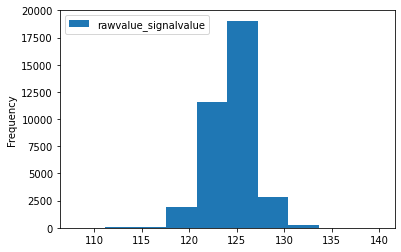

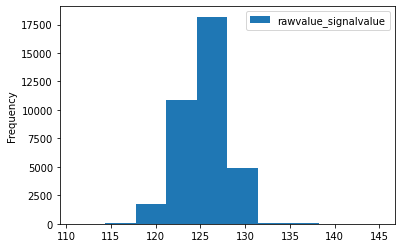

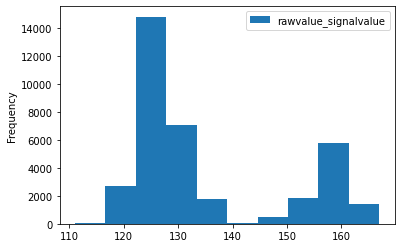

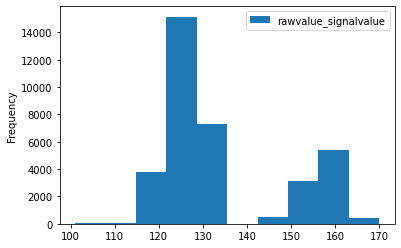

In [46]:
dfH.drop(["interpretedvalue_asdoublevalue", "timeofoccurrence", "metadata_sessionsequence", "metadata_sourceid", "metadata_sessionsequence"], axis=1).groupby("position").plot(kind="hist") # or drop: rawvalue_signalvalue

In [47]:
dfH.groupby("position").count()

,metadata_sourceid,metadata_sessionsequence,metadata_pvin,timeofoccurrence,rawvalue_signalvalue,interpretedvalue_asdoublevalue,signal
position,,,,,,,
HL,35843,35843,35843,35843,35843,35843,35843
HR,35854,35854,35854,35854,35854,35854,35854
VL,35854,35854,35854,35854,35854,35854,35854
VR,35843,35843,35843,35843,35843,35843,35843


In [48]:
dfH.groupby("timeofoccurrence").count()

,metadata_sourceid,metadata_sessionsequence,metadata_pvin,rawvalue_signalvalue,interpretedvalue_asdoublevalue,signal,position
timeofoccurrence,,,,,,,
1651239453198,3,3,3,3,3,3,3
1651239453218,4,4,4,4,4,4,4
1651239453238,4,4,4,4,4,4,4
1651239453258,4,4,4,4,4,4,4
1651239453278,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...
1651359532945,4,4,4,4,4,4,4
1651359532965,4,4,4,4,4,4,4
1651359532985,4,4,4,4,4,4,4


# Pivot table according to time of occurence

In [49]:
sample_matrix_hohenwert = dfH.pivot(index='timeofoccurrence', columns='position', values='rawvalue_signalvalue').iloc[:36777].fillna(axis=0, method='bfill')

In [50]:
sample_matrix_hohenwert

position,HL,HR,VL,VR
timeofoccurrence,,,,
1651239453198,125.0,126.0,124.0,123.0
1651239453218,125.0,126.0,124.0,123.0
1651239453238,125.0,126.0,124.0,123.0
1651239453258,125.0,126.0,124.0,123.0
1651239453278,125.0,126.0,124.0,123.0
...,...,...,...,...
1651359532945,125.0,126.0,125.0,126.0
1651359532965,125.0,126.0,125.0,126.0
1651359532985,125.0,126.0,125.0,126.0


In [51]:
sample_matrix_hohenwert[sample_matrix_hohenwert.isna().any(axis=1)]

position,HL,HR,VL,VR
timeofoccurrence,,,,


In [52]:
cov_matrix_hohenwert = sample_matrix_hohenwert.cov()

# TODO: check this again! HR and HL have to be corrolated 

<AxesSubplot:xlabel='position', ylabel='position'>

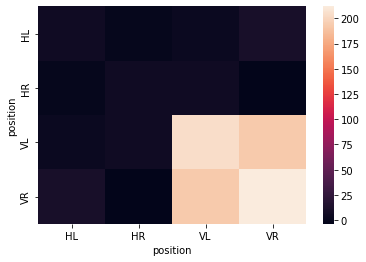

In [53]:
sns.heatmap(cov_matrix_hohenwert)

<AxesSubplot:xlabel='timeofoccurrence'>

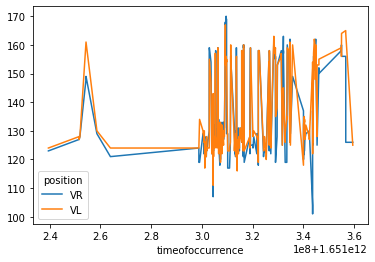

In [54]:
sample_matrix_hohenwert[["VR", "VL"]].plot(kind="line")

<AxesSubplot:xlabel='timeofoccurrence'>

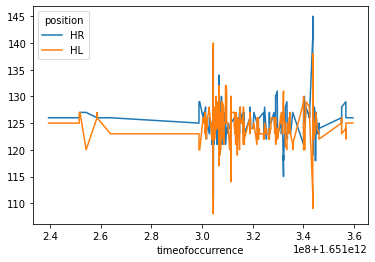

In [55]:
sample_matrix_hohenwert[["HR", "HL"]].plot(kind="line")

# Distribution of acceleration values

In [56]:
dfFA_2022_04_30_formatted

,metadata_sourceid,metadata_sessionsequence,metadata_pvin,timeofoccurrence,rawvalue_signalvalue,interpretedvalue_asdoublevalue,signal,position
1066283,Porsche:DE,3,408eb1d94d97ed260b85558bc4fc1c8a,1651313634780,1021,-0.03,BodyAcceleration,HL
1066284,Porsche:BE,2,e3bf5f8ba91f17a185e5cafcf6db8ccb,1651304585775,1019,-0.07,BodyAcceleration,HL
1066285,Porsche:DE,3,408eb1d94d97ed260b85558bc4fc1c8a,1651313634800,1023,0.01,BodyAcceleration,HL
1066286,Porsche:BE,2,e3bf5f8ba91f17a185e5cafcf6db8ccb,1651304585795,989,-0.67,BodyAcceleration,HL
1066287,Porsche:DE,3,408eb1d94d97ed260b85558bc4fc1c8a,1651313634820,1021,-0.03,BodyAcceleration,HL
...,...,...,...,...,...,...,...,...
1388717,Porsche:IT,17,ed08e1f04f52bd053646aad5eed9d936,1651355009958,125,-2.00,Hoehenwert,HL
1388718,Porsche:IT,17,ed08e1f04f52bd053646aad5eed9d936,1651355009978,125,-2.00,Hoehenwert,HL
1388719,Porsche:IT,17,ed08e1f04f52bd053646aad5eed9d936,1651355009998,125,-2.00,Hoehenwert,HL
1388720,Porsche:IT,17,ed08e1f04f52bd053646aad5eed9d936,1651355010018,125,-2.00,Hoehenwert,HL


In [57]:
df_body_acceleration = dfFA_2022_04_30_formatted[dfFA_2022_04_30_formatted.signal == "BodyAcceleration"]

In [58]:
df_body_acceleration.columns

Index(['metadata_sourceid', 'metadata_sessionsequence', 'metadata_pvin',
       'timeofoccurrence', 'rawvalue_signalvalue',
       'interpretedvalue_asdoublevalue', 'signal', 'position'],
      dtype='object')

position
HL    AxesSubplot(0.125,0.125;0.775x0.755)
HR    AxesSubplot(0.125,0.125;0.775x0.755)
VL    AxesSubplot(0.125,0.125;0.775x0.755)
VR    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

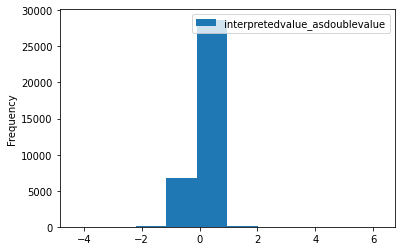

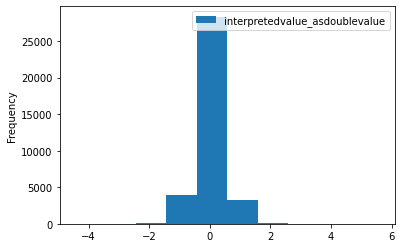

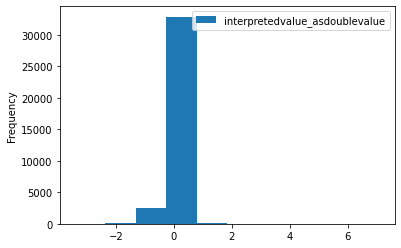

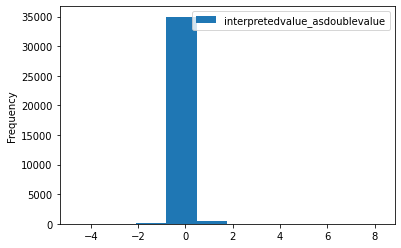

In [59]:
df_body_acceleration.drop(["rawvalue_signalvalue", "timeofoccurrence", "metadata_sessionsequence", "metadata_sourceid"], axis=1).groupby("position").plot(kind="hist") # or drop: rawvalue_signalvalue

In [60]:
df_body_acceleration.groupby("position").count()

,metadata_sourceid,metadata_sessionsequence,metadata_pvin,timeofoccurrence,rawvalue_signalvalue,interpretedvalue_asdoublevalue,signal
position,,,,,,,
HL,35661,35661,35661,35661,35661,35661,35661
HR,35877,35877,35877,35877,35877,35877,35877
VL,35639,35639,35639,35639,35639,35639,35639
VR,35644,35644,35644,35644,35644,35644,35644


In [61]:
df_body_acceleration.groupby("timeofoccurrence").count()

,metadata_sourceid,metadata_sessionsequence,metadata_pvin,rawvalue_signalvalue,interpretedvalue_asdoublevalue,signal,position
timeofoccurrence,,,,,,,
1651239453198,3,3,3,3,3,3,3
1651239453208,1,1,1,1,1,1,1
1651239453218,3,3,3,3,3,3,3
1651239453228,1,1,1,1,1,1,1
1651239453238,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...
1651359532985,3,3,3,3,3,3,3
1651359532995,1,1,1,1,1,1,1
1651359533005,3,3,3,3,3,3,3


# Find which signal is not synchronized with the others and align time of occurence (acceleration data) -> VR is not aligned

In [62]:
sample_matrix_acc = df_body_acceleration.pivot(index='timeofoccurrence', columns='position', values='rawvalue_signalvalue').iloc[:35639]# .fillna(axis=0, method='bfill')
sample_matrix_acc

position,HL,HR,VL,VR
timeofoccurrence,,,,
1651239453198,1023.0,1025.0,1021.0,NaN
1651239453208,NaN,NaN,NaN,1023.0
1651239453218,1023.0,1022.0,1024.0,NaN
1651239453228,NaN,NaN,NaN,1021.0
1651239453238,1021.0,1020.0,1023.0,NaN
...,...,...,...,...
1651314707267,1023.0,1025.0,1021.0,NaN
1651314707277,NaN,NaN,NaN,1022.0
1651314707287,1023.0,1022.0,1022.0,NaN


In [63]:
timeofoccurence_VR_ori = df_body_acceleration.loc[df_body_acceleration["position"] == "VR"].timeofoccurrence
timeofoccurence_VR_aligned = df_body_acceleration.loc[df_body_acceleration["position"] == "VR"].timeofoccurrence.add(-10)

In [64]:
timeofoccurence_VR_ori - timeofoccurence_VR_aligned

1068283    10
1068284    10
1068285    10
1068286    10
1068287    10
           ..
1387967    10
1387968    10
1387969    10
1387970    10
1387971    10
Name: timeofoccurrence, Length: 35644, dtype: int64

In [65]:
df_body_acceleration.loc[df_body_acceleration["position"] == "VR", "timeofoccurrence"] = timeofoccurence_VR_aligned.values

/Users/p392827/Desktop/PDG/porsche-research/pac-learning/pac-venv/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [66]:
sample_matrix_acc = df_body_acceleration.pivot(index='timeofoccurrence', columns='position', values='rawvalue_signalvalue').iloc[:35639]# .fillna(axis=0, method='bfill')
sample_matrix_acc

position,HL,HR,VL,VR
timeofoccurrence,,,,
1651239453198,1023.0,1025.0,1021.0,1023.0
1651239453218,1023.0,1022.0,1024.0,1021.0
1651239453238,1021.0,1020.0,1023.0,1023.0
1651239453258,1021.0,1022.0,1021.0,1021.0
1651239453278,1023.0,1022.0,1021.0,1021.0
...,...,...,...,...
1651344932371,1019.0,1022.0,1018.0,1025.0
1651344932391,1022.0,1028.0,1018.0,1023.0
1651344932411,1022.0,1028.0,1018.0,1023.0


In [67]:
sample_matrix_acc[sample_matrix_acc.isna().any(axis=1)]

position,HL,HR,VL,VR
timeofoccurrence,,,,
1651251873199,NaN,NaN,NaN,1023.0
1651254282459,1019.0,NaN,NaN,NaN
1651254282479,1038.0,NaN,NaN,NaN
1651254282499,1037.0,NaN,NaN,NaN
1651254282519,999.0,NaN,NaN,NaN
...,...,...,...,...
1651344634923,NaN,1025.0,NaN,NaN
1651344911652,NaN,1014.0,NaN,NaN
1651344911672,NaN,1014.0,NaN,NaN


# Note: bfill is used to fill the Nan values -> otherwise around 3600 timestamps don't have the values for the 4 positions

In [68]:
sample_matrix_acc = df_body_acceleration.pivot(index='timeofoccurrence', columns='position', values='rawvalue_signalvalue').iloc[:35639].fillna(axis=0, method='bfill')
sample_matrix_acc

position,HL,HR,VL,VR
timeofoccurrence,,,,
1651239453198,1023.0,1025.0,1021.0,1023.0
1651239453218,1023.0,1022.0,1024.0,1021.0
1651239453238,1021.0,1020.0,1023.0,1023.0
1651239453258,1021.0,1022.0,1021.0,1021.0
1651239453278,1023.0,1022.0,1021.0,1021.0
...,...,...,...,...
1651344932371,1019.0,1022.0,1018.0,1025.0
1651344932391,1022.0,1028.0,1018.0,1023.0
1651344932411,1022.0,1028.0,1018.0,1023.0


In [69]:
sample_matrix_acc[sample_matrix_acc.isna().any(axis=1)]

position,HL,HR,VL,VR
timeofoccurrence,,,,


<AxesSubplot:xlabel='position', ylabel='position'>

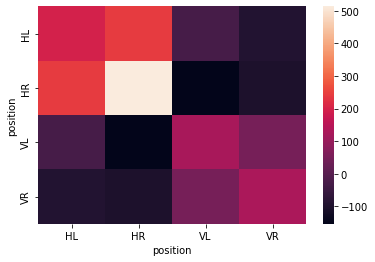

In [70]:
cov_matrix_accelerationg = sample_matrix_acc.cov()
sns.heatmap(cov_matrix_accelerationg)

<AxesSubplot:xlabel='timeofoccurrence'>

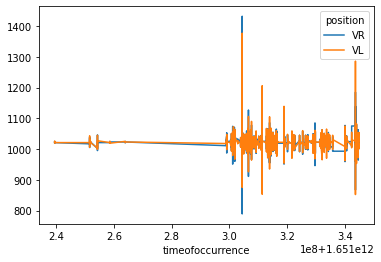

In [71]:
sample_matrix_acc[["VR", "VL"]].plot(kind="line")

<AxesSubplot:xlabel='timeofoccurrence'>

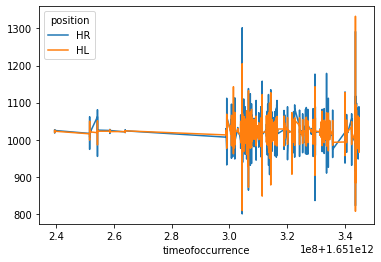

In [72]:
sample_matrix_acc[["HR", "HL"]].plot(kind="line")

# ESP data analysis

In [73]:
dfESP

,metadata_sourceid,metadata_sessionsequence,metadata_pvin,date,signaldata_signalid,signaldata_signalname,signaldata_timeofoccurrence,signaldata_rawvalue_signalvalue,signaldata_interpretedvalue_asdoublevalue
0,Porsche:IT,5,c7b0a1b3051fba5898dc460291c2d32f,2022-04-28,102812,ESP_v_Signal,1651159427639,0,0.0
1,Porsche:DE,1,a36767d2f8c7280fbbb4f113909f3e3b,2022-04-28,102812,ESP_v_Signal,1651129811129,0,0.0
2,Porsche:IT,5,c7b0a1b3051fba5898dc460291c2d32f,2022-04-28,102812,ESP_v_Signal,1651159427659,0,0.0
3,Porsche:DE,1,a36767d2f8c7280fbbb4f113909f3e3b,2022-04-28,102812,ESP_v_Signal,1651129811149,0,0.0
4,Porsche:IT,5,c7b0a1b3051fba5898dc460291c2d32f,2022-04-28,102812,ESP_v_Signal,1651159427679,0,0.0
...,...,...,...,...,...,...,...,...,...
9347499,Porsche:DE,0,aef70266af644c03d56cd20fdc45c2e4,2022-05-09,102812,ESP_v_Signal,1652126490140,0,0.0
9347500,Porsche:DE,0,aef70266af644c03d56cd20fdc45c2e4,2022-05-09,102812,ESP_v_Signal,1652126490160,0,0.0
9347501,Porsche:DE,0,aef70266af644c03d56cd20fdc45c2e4,2022-05-09,102812,ESP_v_Signal,1652126490180,0,0.0
9347502,Porsche:DE,0,aef70266af644c03d56cd20fdc45c2e4,2022-05-09,102812,ESP_v_Signal,1652126490200,0,0.0


In [74]:
dfESP["signaldata_rawvalue_signalvalue"].value_counts()

0       895743
33        5339
39        4205
56        3215
61        3032
         ...  
3498         1
4010         1
3661         1
3656         1
3841         1
Name: signaldata_rawvalue_signalvalue, Length: 676, dtype: int64

In [75]:
dfESP_2022_04_30 = dfESP[dfESP["date"] == "2022-04-30"]
dfESP_2022_04_30 = dfESP_2022_04_30.rename(columns=lambda s: s.replace("signaldata_", ""))
dfESP_2022_04_30.groupby("timeofoccurrence").count()

,metadata_sourceid,metadata_sessionsequence,metadata_pvin,date,signalid,signalname,rawvalue_signalvalue,interpretedvalue_asdoublevalue
timeofoccurrence,,,,,,,,
1651239453198,1,1,1,1,1,1,1,1
1651239453218,1,1,1,1,1,1,1,1
1651239453238,1,1,1,1,1,1,1,1
1651239453258,1,1,1,1,1,1,1,1
1651239453278,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
1651359532946,1,1,1,1,1,1,1,1
1651359532966,1,1,1,1,1,1,1,1
1651359532986,1,1,1,1,1,1,1,1


In [76]:
dfESP_2022_04_30.groupby("metadata_sessionsequence").count()

,metadata_sourceid,metadata_pvin,date,signalid,signalname,timeofoccurrence,rawvalue_signalvalue,interpretedvalue_asdoublevalue
metadata_sessionsequence,,,,,,,,
0,1250,1250,1250,1250,1250,1250,1250,1250
1,1250,1250,1250,1250,1250,1250,1250,1250
2,1249,1249,1249,1249,1249,1249,1249,1249
3,1500,1500,1500,1500,1500,1500,1500,1500
4,1000,1000,1000,1000,1000,1000,1000,1000
5,750,750,750,750,750,750,750,750
6,750,750,750,750,750,750,750,750
7,750,750,750,750,750,750,750,750
8,750,750,750,750,750,750,750,750


In [77]:
dfESP_2022_04_30.groupby("metadata_sourceid").count()

,metadata_sessionsequence,metadata_pvin,date,signalid,signalname,timeofoccurrence,rawvalue_signalvalue,interpretedvalue_asdoublevalue
metadata_sourceid,,,,,,,,
Porsche:BE,4353,4353,4353,4353,4353,4353,4353,4353
Porsche:DE,15780,15780,15780,15780,15780,15780,15780,15780
Porsche:GB,750,750,750,750,750,750,750,750
Porsche:IT,5750,5750,5750,5750,5750,5750,5750,5750
Porsche:NL,3500,3500,3500,3500,3500,3500,3500,3500
Porsche:PL,2247,2247,2247,2247,2247,2247,2247,2247
Porsche:SE,3499,3499,3499,3499,3499,3499,3499,3499


In [78]:
dfESP_2022_04_30.groupby("metadata_pvin").count()

,metadata_sourceid,metadata_sessionsequence,date,signalid,signalname,timeofoccurrence,rawvalue_signalvalue,interpretedvalue_asdoublevalue
metadata_pvin,,,,,,,,
252f826f1e2bfa3784ae629a665cfcae,250,250,250,250,250,250,250,250
3547965a4cd66a3e7d36b8b5847eac92,475,475,475,475,475,475,475,475
408eb1d94d97ed260b85558bc4fc1c8a,1000,1000,1000,1000,1000,1000,1000,1000
4989ca4dc2f8c580284eb3c5d0c01cae,2247,2247,2247,2247,2247,2247,2247,2247
6086b94a1994a388f74a786a40a53401,1874,1874,1874,1874,1874,1874,1874,1874
6f3f48c7e421cecd7568e4ccb0e48986,1250,1250,1250,1250,1250,1250,1250,1250
7884f65ba95744d9ea56f3040254d9fc,750,750,750,750,750,750,750,750
7edd91949310d2fc03866df1c440203a,3500,3500,3500,3500,3500,3500,3500,3500
8e54ddde2e1c2293b27c5b4fbb8da3fe,3499,3499,3499,3499,3499,3499,3499,3499


# TODO: create the training dataset (window size)
# col : car_id, ith datapoint: 9 signal values with window size per row -> expanded columnwise 

In [79]:
# - Question: are the signals shifted on purpose? 